# Text Parser Testing document

This document is going to read the text file found in ../generated_data/Logs2020OCR_avepdf.com_horizontal.txt which was generated using the following website:


[avepdf.com](http://avepdf.com/)

In [1]:
import WilliamstownData as wd

In [2]:
#read in the data 
filename='../generated_data/Logs2019OCR_avepdf.com_horizontal.txt'
dict2019 = wd.parsefile(filename)
filename='../generated_data/Logs2020OCR_avepdf.com_horizontal.txt'
dict2020 = wd.parsefile(filename)


lines = dict2019[0]+dict2020[0]
calls = dict2019[1]+dict2020[1]
call_dicts = dict2019[2]+dict2020[2]

unit error: disp-03,15,13 enrt-03


In [3]:
#Review call parcing data
from ipywidgets import interact

def view_both(index=0):
    print("RAW CALL DATA\n")
    for line in calls[index]:
        print(line)
    print('========================================')
    print("PARSED DATA\n")
    for key in call_dicts[index]:
        print(f"{key}: {call_dicts[index][key]}")
    
target = interact(view_both, index=(0,len(calls)-1))

interactive(children=(IntSlider(value=0, description='index', max=18979), Output()), _dom_classes=('widget-int…

In [4]:
#Exmaple Count number of STOPS by "Craig"
total_stops = 0 
tot = 0
total_race = {}
norace = 0
my_stops = []
for call in call_dicts:
    if 'call taker' in call:
        if "hammer" in call['call taker'].lower():
            tot += 1
#             print(call['callReason'])
            if "STOP" in call['reason']:
                my_stops.append(call)
                total_stops += 1
                if 'operator_race' in call:
                    race = call['operator_race'].lower()
                    if race in total_race:
                        total_race[race] = total_race[race]+1
                    else:
                        total_race[race] = 1
                else:
                    norace +=1

In [5]:
total_stops

23

In [6]:
tot

399

In [7]:
total_race

{'u': 14, 'w': 7}

In [8]:
#Make a list of names
def name_counter(call_dicts):
    name_dict = {}

    for call in call_dicts:
        if 'call taker' in call:
            name = call['call taker']
            if name in name_dict:
                name_dict[name] = name_dict[name] + 1
            else:
                name_dict[name] = 1
    return name_dict

name_dict = name_counter(call_dicts)

In [9]:
name_dict

{'PATROL CRAIG A EICHHAMMER': 396,
 'PATROL DAVID JENNINGS, D': 1857,
 'DISPATCHER CHRISTINE LEMOINE': 510,
 'CHIEF KYLE J JOHNSON': 768,
 'PATROL KALVIN DZIEDZIAK': 1330,
 'PATROL JOHN J MCCONNELL JR': 1025,
 'PATROL KEVIN P GARNER': 640,
 'PATROL SHUAN N WILLIAM': 994,
 'SERGEANT PAUL D THOMPSON': 307,
 'PATROL ANTHONY M DUPRAT': 761,
 'PATROL TANIA HERNANDEZ': 2170,
 'PATROLMAN MICHAEL J ZIEMBA Jr': 545,
 'SERGEANT DAVID R LEMIEUX': 769,
 'DISPATCHER LAURIE TOPER': 162,
 'PATROLMAN SCOTT SKORUPSKI': 517,
 'DISPATCHER WILLIAM C JENNINGS JR': 508,
 'PATROL KAlVIN DZIEDZIAK': 1,
 'PATROLMAN MICBAEL J ZIEMBA Jr': 2,
 'SERGEANT SCOTT E MCGOWAN': 1501,
 'DISPATCHER LAURIE TUPER': 999,
 'PATROL CRAIG A EICIIHAMMER': 2,
 'ALL EQUIPMENT POLICE DEPARTMENT': 150,
 "PATROL DAVID JENNINGS,' D": 1,
 'SERGEANT jlCOTT E MCGOWAN': 1,
 'PATROLMAN MICHAELJ ZIEMBA Jr': 7,
 'PATROLMAN SCOIT SKORUPSKI': 4,
 'PATROL CRAIG A EIC!IHAMMER': 1,
 'PATROL CRAIG A EICHHI\\MMER': 3,
 'PATROL CRAIG A EIC!ffiAMMER'

In [10]:
from fuzzywuzzy import fuzz, process
import pandas as pd
import numpy as np

df = pd.DataFrame()

names, count = [], []

for k,v in name_dict.items():
    names.append(k)
    count.append(v)
    
    
df['call taker'] = names
df['count'] = count

print(df.shape)
df.head(20)

/Users/colbrydi/Desktop/msu-datathon-4-justice/envs/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


(210, 2)


,call taker,count
0,PATROL CRAIG A EICHHAMMER,396
1,"PATROL DAVID JENNINGS, D",1857
2,DISPATCHER CHRISTINE LEMOINE,510
3,CHIEF KYLE J JOHNSON,768
4,PATROL KALVIN DZIEDZIAK,1330
5,PATROL JOHN J MCCONNELL JR,1025
6,PATROL KEVIN P GARNER,640
7,PATROL SHUAN N WILLIAM,994
8,SERGEANT PAUL D THOMPSON,307
9,PATROL ANTHONY M DUPRAT,761


In [11]:
#Manullay determined after seeing repeats from above

top_names = ["TANIA HERNANDEZ",
"DAVID JENNINGS, D",
"SCOTT E MCGOWAN",
"BRAD SACCO",
"KALVIN DZIEDZIAK",
"JOHN J MCCONNELL JR",
"LAURIE TUPER",
"SHUAN N WILLIAM",
"KYLE J JOHNSON",
"DAVID R LEMIEUX",
"ANTHONY M DUPRAT",
"KEVIN P GARNER",
"MICHAEL J ZIEMBA Jr",
"SCOTT SKORUPSKI",
"CHRISTINE LEMOINE",
"WILLIAM C JENNINGS JR",
"MICHAEL J ZIEMBA Jr",
"CRAIG A EICHHAMMER",
"PAUL D THOMPSON",
"MICHAEL STRIZZI",
"LAURIE TOPER",
"ALL EQUIPMENT POLICE DEPARTMENT",
"BARB BRUCATO"]

In [12]:
from fuzzywuzzy import fuzz, process

df['Fuzzy Names'] = ''

def fuzz_match():
    matched = []
    rank_list = ["CHIEF", "PATROL", "FATROL", "DISPATCHER", "SERGEANT", "LIEUTENANT", "'", "PATROLMMI", "PATROLMAN",
                'SERGEAN"T', "PATROU'1AN", "LIEUTRNANT", "SERGEAl<T", "DISJ?ATCHER", "SERGE~.NT", "?ATROL", "SERGBANT",
                "PAT~OL", "LIEUTENANI", ]
    for i, names in enumerate(df['call taker']): 
        name = names.split()

        rank = [rank for rank in rank_list if name[0] in rank]
        for r in rank:
            if r in name:
                name.remove(r)
            continue

        name = ' '.join(name)
            
        df.loc[i, 'Fuzzy Names'] = name

        highest = process.extractOne(name,top_names)
        match = highest[0]

        df.loc[i, 'Matched'] = match            
    return df
df = fuzz_match()

In [13]:
df

,call taker,count,Fuzzy Names,Matched
0,PATROL CRAIG A EICHHAMMER,396,CRAIG A EICHHAMMER,CRAIG A EICHHAMMER
1,"PATROL DAVID JENNINGS, D",1857,"DAVID JENNINGS, D","DAVID JENNINGS, D"
2,DISPATCHER CHRISTINE LEMOINE,510,CHRISTINE LEMOINE,CHRISTINE LEMOINE
3,CHIEF KYLE J JOHNSON,768,KYLE J JOHNSON,KYLE J JOHNSON
4,PATROL KALVIN DZIEDZIAK,1330,KALVIN DZIEDZIAK,KALVIN DZIEDZIAK
...,...,...,...,...
205,DISPATCHER LAURIE WPER,3,LAURIE WPER,LAURIE TUPER
206,PATROL CRAIG A EIC!Il!AMMER,1,CRAIG A EIC!Il!AMMER,CRAIG A EICHHAMMER
207,PATROL CRAIG A EICIIl!AMMER,1,CRAIG A EICIIl!AMMER,CRAIG A EICHHAMMER
208,PATROL SITTJANN WILLIAM,1,SITTJANN WILLIAM,SHUAN N WILLIAM


In [17]:
lookup = {}
for index, row in df.iterrows():
    lookup[row['call taker']] = row['Matched']
lookup

{'PATROL CRAIG A EICHHAMMER': 'CRAIG A EICHHAMMER',
 'PATROL DAVID JENNINGS, D': 'DAVID JENNINGS, D',
 'DISPATCHER CHRISTINE LEMOINE': 'CHRISTINE LEMOINE',
 'CHIEF KYLE J JOHNSON': 'KYLE J JOHNSON',
 'PATROL KALVIN DZIEDZIAK': 'KALVIN DZIEDZIAK',
 'PATROL JOHN J MCCONNELL JR': 'JOHN J MCCONNELL JR',
 'PATROL KEVIN P GARNER': 'KEVIN P GARNER',
 'PATROL SHUAN N WILLIAM': 'SHUAN N WILLIAM',
 'SERGEANT PAUL D THOMPSON': 'PAUL D THOMPSON',
 'PATROL ANTHONY M DUPRAT': 'ANTHONY M DUPRAT',
 'PATROL TANIA HERNANDEZ': 'TANIA HERNANDEZ',
 'PATROLMAN MICHAEL J ZIEMBA Jr': 'MICHAEL J ZIEMBA Jr',
 'SERGEANT DAVID R LEMIEUX': 'DAVID R LEMIEUX',
 'DISPATCHER LAURIE TOPER': 'LAURIE TOPER',
 'PATROLMAN SCOTT SKORUPSKI': 'SCOTT SKORUPSKI',
 'DISPATCHER WILLIAM C JENNINGS JR': 'WILLIAM C JENNINGS JR',
 'PATROL KAlVIN DZIEDZIAK': 'KALVIN DZIEDZIAK',
 'PATROLMAN MICBAEL J ZIEMBA Jr': 'MICHAEL J ZIEMBA Jr',
 'SERGEANT SCOTT E MCGOWAN': 'SCOTT E MCGOWAN',
 'DISPATCHER LAURIE TUPER': 'LAURIE TUPER',
 'PATROL C

In [18]:
for call in call_dicts:
    if 'call taker' in call:
        name = call['call taker']
        if name in lookup:
            call['call taker'] = lookup[name]

In [29]:
name_dict = name_counter(call_dicts)

name_dict = {k: v for k, v in sorted(name_dict.items(), key=lambda item: item[1], reverse=True)}
name_dict


{'TANIA HERNANDEZ': 2193,
 'DAVID JENNINGS, D': 1864,
 'SCOTT E MCGOWAN': 1570,
 'BRAD SACCO': 1377,
 'KALVIN DZIEDZIAK': 1343,
 'JOHN J MCCONNELL JR': 1057,
 'SHUAN N WILLIAM': 1037,
 'MICHAEL J ZIEMBA Jr': 1025,
 'LAURIE TUPER': 1025,
 'ANTHONY M DUPRAT': 800,
 'KYLE J JOHNSON': 778,
 'DAVID R LEMIEUX': 773,
 'KEVIN P GARNER': 644,
 'SCOTT SKORUPSKI': 537,
 'WILLIAM C JENNINGS JR': 512,
 'CHRISTINE LEMOINE': 511,
 'CRAIG A EICHHAMMER': 418,
 'PAUL D THOMPSON': 311,
 'MICHAEL STRIZZI': 273,
 'LAURIE TOPER': 163,
 'ALL EQUIPMENT POLICE DEPARTMENT': 152,
 'BARB BRUCATO': 96}

Text(0.5, 0, 'Officer Name')

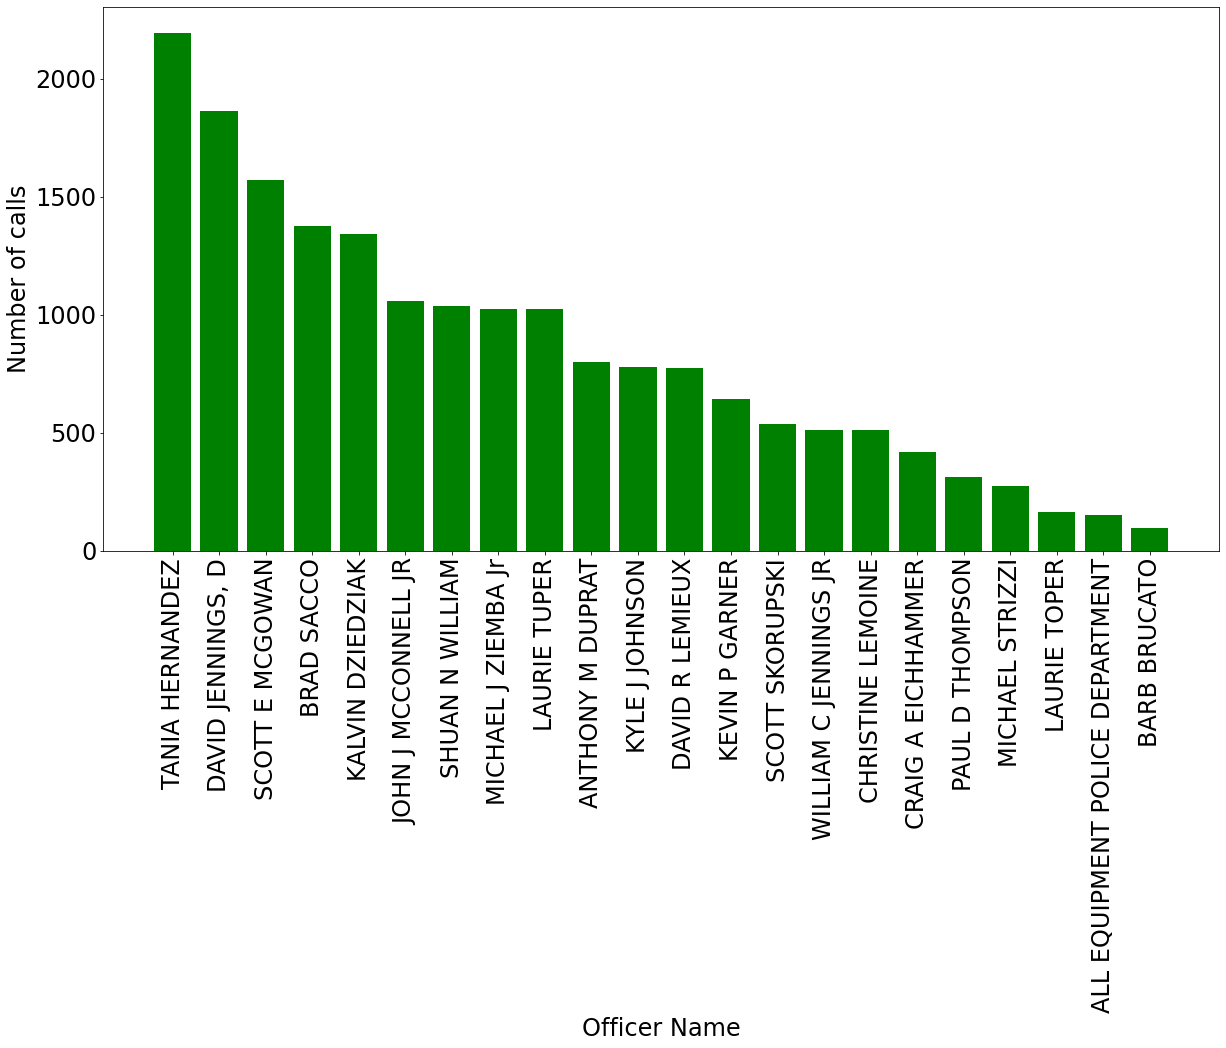

In [38]:
import matplotlib.pyplot as plt

plt.figure(figsize=(20,10))
plt.rcParams.update({'font.size':24})
plt.bar(list(name_dict.keys()), name_dict.values(), color='g')
plt.xticks(rotation=90);
plt.ylabel('Number of calls')
plt.xlabel('Officer Name')

In [22]:
dir(name_dict)

['__class__',
 '__class_getitem__',
 '__contains__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__ior__',
 '__iter__',
 '__le__',
 '__len__',
 '__lt__',
 '__ne__',
 '__new__',
 '__or__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__reversed__',
 '__ror__',
 '__setattr__',
 '__setitem__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 'clear',
 'copy',
 'fromkeys',
 'get',
 'items',
 'keys',
 'pop',
 'popitem',
 'setdefault',
 'update',
 'values']